In [12]:
#The first model in this notebook predicts, for each of the 4 QuadClasses and 

#each of the 4 Actor1KnownGroupCodes most frequently associated to articles mentioning Trump, the number of 

#articles published tomorrow that will mention Trump and have a given QuadClass and Actor1KnownGroupCode



#The Quadclass of an event describes at a high level the kind of interaction between an event's Actor 1 and Actor 2; they are

#Verbal_Cooperation, Material_Cooperation, Verbal_Conflict, and Material_Conflict


#The four Actor1KnownGroupCodes most frequently recorded as the Actor 1 in articles mentioning Trump are

# EEC -  European Union
# UNO - United Nations
# TAL - Taliban
# NAT -NATO (North Atlantic Treaty Organization)


In [13]:
#the csv 'trump_counts.csv' has 1 row per day from 2012/07/30 to 2019/11/03, 1 column per each of the 4 distinct QuadClass event-designations, counting the number of articles on a given day which both are of that column's QuadClass and mention Trump, 1 column per each of the four Actor1KnownGroupCodes most frequently associated with articles mentioning Trump counting the number of articles on a given day which both are of that column's Actor1KnownGroupCode and mention Trump, a column of datetimes, and a column containing a list of these 8 counts 

#a string representing a list of counts

import pandas as pd

trump_counts = pd.read_csv('trump_counts.csv')

print(trump_counts.columns)

trump_counts = trump_counts.drop(['Unnamed: 0'], axis = 1)

print(trump_counts.columns)

print(trump_counts.head(5),type(trump_counts.vector_counts[0])) #trump_decision_tree.col contains strings instead of lists of numerical counts

Index(['Unnamed: 0', 'EEC', 'UNO', 'NAT', 'TAL', 'Verbal_Cooperation',
       'Material_Cooperation', 'Verbal_Conflict', 'Material_Conflict', 'dates',
       'vector_counts'],
      dtype='object')
Index(['EEC', 'UNO', 'NAT', 'TAL', 'Verbal_Cooperation',
       'Material_Cooperation', 'Verbal_Conflict', 'Material_Conflict', 'dates',
       'vector_counts'],
      dtype='object')
   EEC  UNO  NAT  TAL  Verbal_Cooperation  Material_Cooperation  \
0    0    0    0    1                   0                     0   
1    0    0    0    0                   0                     0   
2    0    0    0    0                   0                     0   
3    0    0    0    0                   0                     0   
4    0    0    0    0                   0                     0   

   Verbal_Conflict  Material_Conflict                     dates  \
0                0                  1  2012-07-30T00:00:00.000Z   
1                0                  0  2012-07-31T00:00:00.000Z   
2             

In [14]:
import numpy as np

to_int_list = [np.array([int(i[1]) for i in trump_counts.vector_counts[j].split(',')]) for j in range(len(trump_counts))] #turn strings into corresponding lists of integers

trump_decision_tree = pd.DataFrame({'counts':to_int_list}) #select columns to be used for fitting decision tree

print(trump_decision_tree.head(5),type(trump_decision_tree.counts[0]))

                     counts
0  [0, 0, 0, 1, 0, 0, 0, 1]
1  [0, 0, 0, 0, 0, 0, 0, 0]
2  [0, 0, 0, 0, 0, 0, 0, 0]
3  [0, 0, 0, 0, 0, 0, 0, 0]
4  [0, 0, 0, 0, 0, 0, 0, 0] <class 'numpy.ndarray'>


In [15]:
len(trump_decision_tree)

2653

In [17]:
obs = trump_decision_tree.counts.values #our observations

num_obs = len(obs)

window_size = 9

X = np.array([np.concatenate(obs[i:i+window_size]) for i in range(num_obs - window_size)]) #the training and test data will have as inputs concatenations of each of the past 9 days' counts, including today's 

print(X[:3],np.array([len(i) != window_size*len(obs[0]) for i in X]).sum(),len(X) == len(trump_decision_tree) - window_size) #all observations in X have length 9*8

[[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 0 True


In [18]:
y = np.array([obs[i+window_size] for i in range(num_obs - window_size)]) #the training and test data will have as outputs tomorrow's counts

len(y) == len(X)

True

Vector R2 on Training Data = 0.11214333766960438
 Mean Vector Residual on Training Data = 1.2325522905628803

Vector R2 on Test Data = 0.0735562627553572
 Mean Vector Residual on Test Data = 1.9904412632774517

Performance on Training Data for EEC

Training R2 = 1.0
 Training Mean Residual = 0.0

Performance on Test Data for EEC

Test R2 = 0.9891200579385719
 Test Mean Residual = 0.0045385779122541605



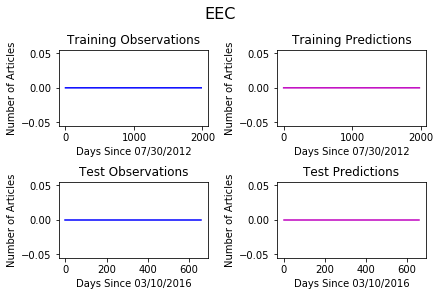

Performance on Training Data for UNO

Training R2 = 0.34781193590977666
 Training Mean Residual = 0.9923864508926442

Performance on Test Data for UNO

Test R2 = 0.24496547147015735
 Test Mean Residual = 2.588146577748402



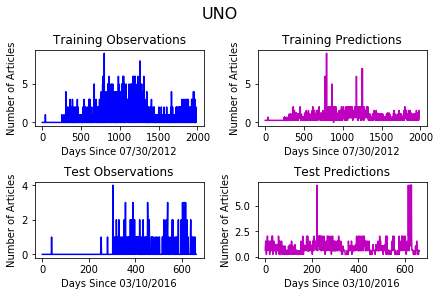

Performance on Training Data for NAT

Training R2 = 0.2963779091908999
 Training Mean Residual = 0.176401573816841

Performance on Test Data for NAT

Test R2 = 0.40514986425206356
 Test Mean Residual = 0.35466626046344374



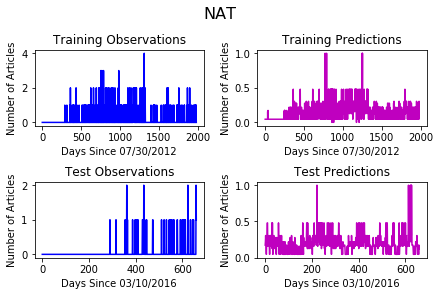

Performance on Training Data for TAL

Training R2 = 0.35484284823593726
 Training Mean Residual = 0.1406778103691283

Performance on Test Data for TAL

Test R2 = 0.30686807022509355
 Test Mean Residual = 0.4971677750300675



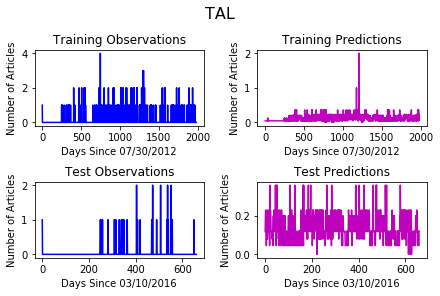

Performance on Training Data for Verbal_Cooperation

Training R2 = 0.33036866992975034
 Training Mean Residual = 0.8570972935386356

Performance on Test Data for Verbal_Cooperation

Test R2 = 0.20004549442770425
 Test Mean Residual = 2.3341134927380454



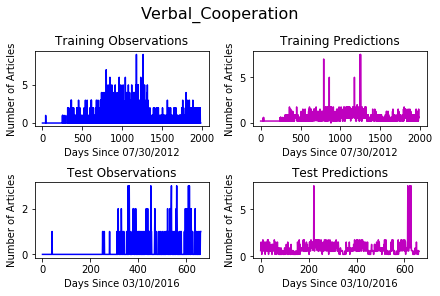

Performance on Training Data for Material_Cooperation

Training R2 = 0.390639424421537
 Training Mean Residual = 0.14420127639782182

Performance on Test Data for Material_Cooperation

Test R2 = 0.5327125042509688
 Test Mean Residual = 0.2440847524891941



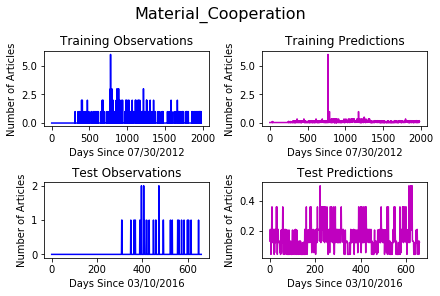

Performance on Training Data for Verbal_Conflict

Training R2 = 0.36518741697263
 Training Mean Residual = 0.1334936800646611

Performance on Test Data for Verbal_Conflict

Test R2 = 0.48845504195027123
 Test Mean Residual = 0.27593298494043567



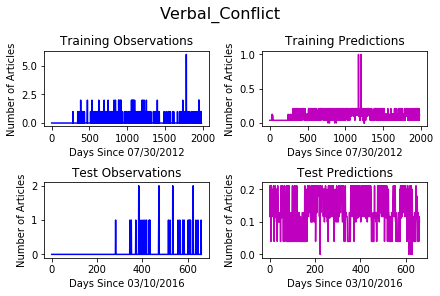

Performance on Training Data for Material_Conflict

Training R2 = 0.3329302113206374
 Training Mean Residual = 0.15509063970944956

Performance on Test Data for Material_Conflict

Test R2 = 0.41229055562552286
 Test Mean Residual = 0.3621240690143767



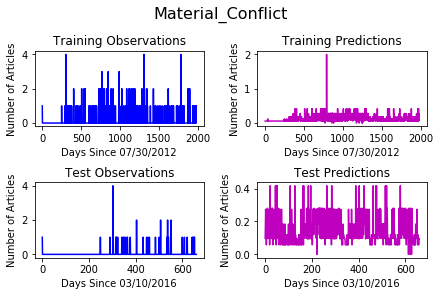

In [31]:
import math

from sklearn.tree import DecisionTreeRegressor

import matplotlib.pyplot as plt

num_vars = 8 #number of article counts recorded each day

X_train = X[:math.floor(len(X)*.75)] #train on 75% of data

#print(len(X_train))

y_train = y[:math.floor(len(y)*.75)] #train on 75% of data

#print(len(y_train))

X_test = X[math.floor(len(X)*.75):] #test on final 25% of data

y_test = y[math.floor(len(X)*.75):] #test on final 25% of data

model_dt = DecisionTreeRegressor(max_depth = 4) #initialize an instance of decision tree model class

model_dt.fit(X_train,y_train) #fit the model

preds_train = model_dt.predict(X_train) #get predictions on training data

preds_test = model_dt.predict(X_test) #get predictions on test data

# plt.plot(range(len(y_train)), preds_train)

# plt.show()

mean_true_train = np.array([np.array([y_train[i][j] for i in range(len(y_train))]).mean() for j in range(num_vars)])

var_true_train = np.array([(((y_train[i] - mean_true_train)**2).sum())**.5 for i in range(len(y_train))]).mean()

res_train = np.array([(((y_train[i] - preds_train[i])**2).sum())**.5 for i in range(len(y_train))]).mean()

R2_train = 1 - res_train/var_true_train

print('Vector R2 on Training Data = ' + str(R2_train) + '\n', 'Mean Vector Residual on Training Data = ' + str(res_train) + '\n')


# plt.plot(range(len(y_test)), preds_test)

# plt.show()

mean_true_test = np.array([np.array([y_test[i][j] for i in range(len(y_test))]).mean() for j in range(num_vars)])

var_true_test = np.array([(((y_test[i] - mean_true_test)**2).sum())**.5 for i in range(len(y_test))]).mean()

res_test = np.array([(((y_test[i] - preds_test[i])**2).sum())**.5 for i in range(len(y_test))]).mean()

R2_test = 1 - res_test/var_true_test

print('Vector R2 on Test Data = ' + str(R2_test) + '\n', 'Mean Vector Residual on Test Data = ' + str(res_test) + '\n')

for i in range(num_vars):
    
    preds_train_i = np.array([j[i] for j in preds_train])
    
    obs_train_i = np.array([j[i] for j in obs[:len(preds_train)]])
    
#     plt.plot(range(len(y_train)), preds_train_i)
    
#     plt.plot(range(len(y_train)), obs_train_i)

    print('Performance on Training Data for ' + trump_counts.columns[i] + '\n')
    
    mean_true_train_i = np.array([y_train[j][i] for j in range(len(y_train))]).mean()

    var_true_train_i = np.array([(y_train[j][i] - mean_true_train)**2 for j in range(len(y_train))]).mean()

    res_train_i = np.array([(y_train[j][i] - preds_train[j][i])**2 for j in range(len(y_train))]).mean()
    
    R2_train_i = 1 - res_train_i/var_true_train_i

    print('Training R2 = ' + str(R2_train_i) + '\n', 'Training Mean Residual = ' + str(res_train_i) + '\n')
    
    print('Performance on Test Data for ' + trump_counts.columns[i] + '\n')
    
    preds_test_i = np.array([j[i] for j in preds_test])
    
    obs_test_i = np.array([j[i] for j in obs[:len(preds_test)]])
    
#     plt.plot(range(len(y_test)), preds_test_i)
    
#     plt.plot(range(len(y_test)), obs_test_i)
    
#     plt.show()
    
    mean_true_test_i = np.array([y_test[j][i] for j in range(len(y_test))]).mean()

    var_true_test_i = np.array([(y_test[j][i] - mean_true_test)**2 for j in range(len(y_test))]).mean()

    res_test_i = np.array([(y_test[j][i] - preds_test[j][i])**2 for j in range(len(y_test))]).mean()
    
    R2_test_i = 1 - res_test_i/var_true_test_i

    print('Test R2 = ' + str(R2_test_i) + '\n', 'Test Mean Residual = ' + str(res_test_i) + '\n')

    
    fig, axs = plt.subplots(2, 2, constrained_layout=True)
    axs[0,0].plot(range(len(y_train)), obs_train_i, 'b')
    axs[0,0].set_title('Training Observations')
    axs[0,0].set_xlabel('Days Since 07/30/2012')
    axs[0,0].set_ylabel('Number of Articles')
    
    axs[0,1].plot(range(len(y_train)), preds_train_i, 'm')
    axs[0,1].set_title('Training Predictions')
    axs[0,1].set_xlabel('Days Since 07/30/2012')
    axs[0,1].set_ylabel('Number of Articles')
    fig.suptitle(trump_counts.columns[i], fontsize=16)
    
    axs[1,0].plot(range(len(y_test)), obs_test_i, 'b')
    axs[1,0].set_title('Test Observations')
    axs[1,0].set_xlabel('Days Since 03/10/2016')
    axs[1,0].set_ylabel('Number of Articles')
    
    axs[1,1].plot(range(len(y_test)), preds_test_i, 'm')
    axs[1,1].set_title('Test Predictions')
    axs[1,1].set_xlabel('Days Since 03/10/2016')
    axs[1,1].set_ylabel('Number of Articles')
    
    plt.show()
    
#     print('Performance on Training Data for ' + trump_counts.columns[i] + '\n')
    
#     mean_true_train_i = np.array([y_train[j][i] for j in range(len(y_train))]).mean()

#     var_true_train_i = np.array([(y_train[j][i] - mean_true_train)**2 for j in range(len(y_train))]).mean()

#     res_train_i = np.array([(y_train[j][i] - preds_train[j][i])**2 for j in range(len(y_train))]).mean()
    
#     R2_train_i = 1 - res_train_i/var_true_train_i

#     print('Training R2 = ' + str(R2_train_i) + '\n', 'Training Mean Residual = ' + str(res_train_i) + '\n')
    
#     print('Performance on Test Data for ' + trump_counts.columns[i] + '\n')
    
#     preds_test_i = np.array([j[i] for j in preds_test])
    
#     obs_test_i = np.array([j[i] for j in obs[:len(preds_test)]])
    
# #     plt.plot(range(len(y_test)), preds_test_i)
    
# #     plt.plot(range(len(y_test)), obs_test_i)
    
# #     plt.show()
    
#     mean_true_test_i = np.array([y_test[j][i] for j in range(len(y_test))]).mean()

#     var_true_test_i = np.array([(y_test[j][i] - mean_true_test)**2 for j in range(len(y_test))]).mean()

#     res_test_i = np.array([(y_test[j][i] - preds_test[j][i])**2 for j in range(len(y_test))]).mean()
    
#     R2_test_i = 1 - res_test_i/var_true_test_i

#     print('Test R2 = ' + str(R2_test_i) + '\n', 'Test Mean Residual = ' + str(res_test_i) + '\n')


In [ ]:
#The next model learns the same prediction task using Vector Autoregression
#instead of decision tree regression.

In [21]:
#To avoid predicting negative counts, each observed count x in the training data is converted to log(x + 1).

trump_var = trump_counts[trump_counts.columns[:8]]

print(trump_var.head(5))

trump_var = np.log(trump_var + 1)

trump_var.head(5)

   EEC  UNO  NAT  TAL  Verbal_Cooperation  Material_Cooperation  \
0    0    0    0    1                   0                     0   
1    0    0    0    0                   0                     0   
2    0    0    0    0                   0                     0   
3    0    0    0    0                   0                     0   
4    0    0    0    0                   0                     0   

   Verbal_Conflict  Material_Conflict  
0                0                  1  
1                0                  0  
2                0                  0  
3                0                  0  
4                0                  0  


,EEC,UNO,NAT,TAL,Verbal_Cooperation,Material_Cooperation,Verbal_Conflict,Material_Conflict
0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [22]:
from statsmodels.tsa.api import VAR

model_var = VAR(np.asarray(trump_var)) #all 8 time series are stationary

In [23]:
for i in [1,2,3,4,5,6,7,8,9]:
    result = model_var.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -27.056604429705075
BIC :  -26.89688308985062
FPE :  1.7760945747076359e-12
HQIC:  -26.998791723481535 

Lag Order = 2
AIC :  -27.066601418702223
BIC :  -26.764811098047637
FPE :  1.758429539641255e-12
HQIC:  -26.957363356488106 

Lag Order = 3
AIC :  -27.171311381701866
BIC :  -26.72736308592977
FPE :  1.5836213410311377e-12
HQIC:  -27.010613776845776 

Lag Order = 4
AIC :  -27.149568018516582
BIC :  -26.563372662847335
FPE :  1.6184411116944654e-12
HQIC:  -26.937376648602587 

Lag Order = 5
AIC :  -27.143279721583625
BIC :  -26.414748130649084
FPE :  1.6286658684370975e-12
HQIC:  -26.87956032838042 

Lag Order = 6
AIC :  -27.16413972540997
BIC :  -26.293182633127
FPE :  1.5950661827759307e-12
HQIC:  -26.848858014819932 

Lag Order = 7
AIC :  -27.180051378671678
BIC :  -26.16657942811546
FPE :  1.5699174959704266e-12
HQIC:  -26.81317302067984 

Lag Order = 8
AIC :  -27.157063982612698
BIC :  -26.000987725889807
FPE :  1.6064653231278042e-12
HQIC:  -26.738554611235

In [24]:
model_var = model_var.fit(3) #choose model with maximum lag such that its AIC is a local minimum

In [25]:
model_var.summary() #the coefficient matrices of the model, with standard errors and corresponding t-statistics for each coefficient, measures of model goodness (how surprised model is by observations, and comlexity-penalizing AIC, BIC), and the correlation matrix for the errors for each time series, characterizing the second moment of the model's uncertainty about the next point in 8-dimensional space given the last 3 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Dec, 2019
Time:                     20:34:56
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -26.7274
Nobs:                     2650.00    HQIC:                  -27.0106
Log likelihood:           6120.49    FPE:                1.58362e-12
AIC:                     -27.1713    Det(Omega_mle):     1.46902e-12
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001113         0.000650            1.712           0.087
L1.y1         0.000633         0.018558            0.034           0.973
L1.y2        -0.003132         0.003373           -0.929           0.353
L1.y3        -0.001209

In [26]:
model_var.test_normality() #ideally, check normality and uncorrelatedness of residuals

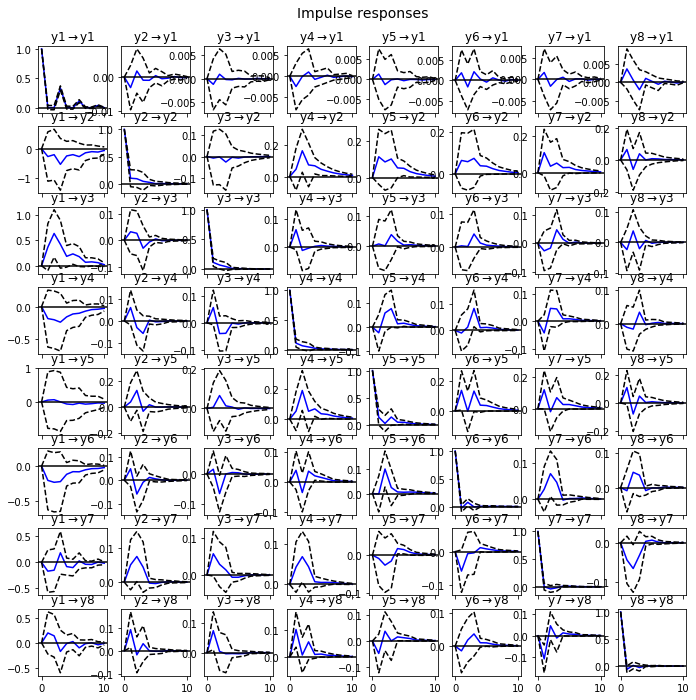

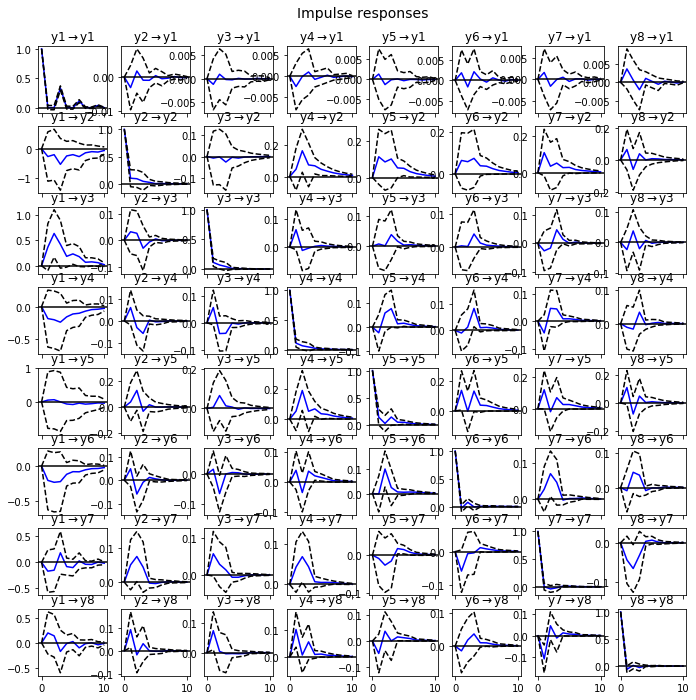

In [27]:
#What does a sudden and instantaneous increase in one time series add to the other time series over time?

irf = model_var.irf(10)

irf.plot(orth=False)

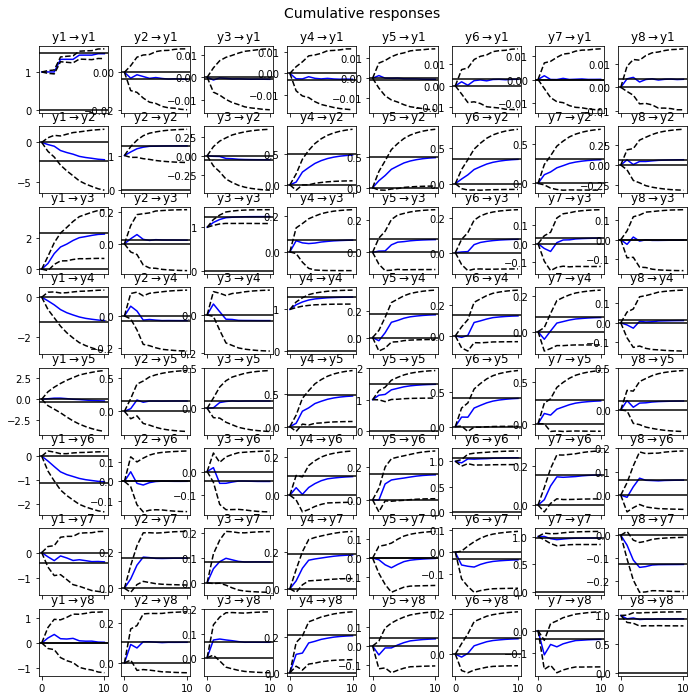

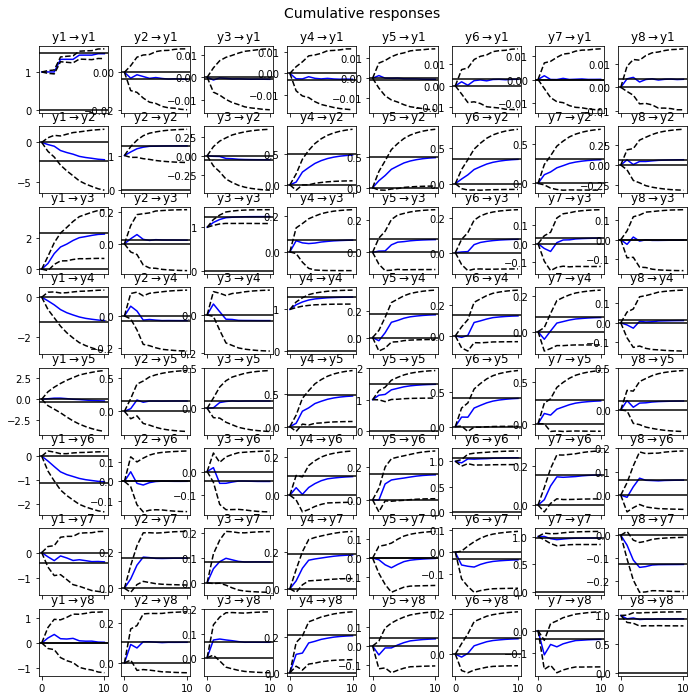

In [28]:
#What is the cumulative effect of a sudden and instantaneous increase in one time series on the other time series over time?

irf.plot_cum_effects(orth=False)

In [29]:
trump_var.columns = range(len(trump_var.columns)) #for convenience of reference

trump_var.head(5)

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.693147
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
#p values for granger causality between count time series:

In [30]:
from statsmodels.tsa.stattools import grangercausalitytests

test = 'ssr_chi2test' #one hypothesis test to use to find a p value for granger causality from one time series to another

pvals = []

maxlag = 5 #maximum lag of one time series used to predict another

for c in trump_var.columns:
    
    row = []
    
    for r in trump_var.columns:
            
        test_result = grangercausalitytests(trump_var[[r, c]], maxlag=maxlag, verbose=False)
            
        p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            
        min_p_value = np.min(p_values)
            
        row.append(min_p_value)
            
    pvals.append(row)
    
pvals

/home/main/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/home/main/.local/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


[[1.0, 0.5134, 0.0011, 0.3609, 0.7078, 0.5199, 0.3711, 0.3936],
 [0.1785, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.4464, 0.0105, 1.0, 0.0011, 0.1873, 0.0341, 0.0008, 0.0027],
 [0.5465, 0.0, 0.0004, 1.0, 0.0001, 0.0, 0.0073, 0.0],
 [0.2011, 0.0002, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.55, 0.137, 0.0268, 0.0024, 0.0, 1.0, 0.0015, 0.0],
 [0.5483, 0.1293, 0.2919, 0.1698, 0.0, 0.0, 1.0, 0.0163],
 [0.3517, 0.0636, 0.0379, 0.0659, 0.0, 0.001, 0.2347, 1.0]]

In [ ]:
#identify statistically significant p-values:

In [124]:
significant = [[int(i < .05) for i in j] for j in pvals]

significant

[[0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1, 1],
 [0, 1, 0, 1, 0, 1, 1, 1],
 [0, 1, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 0, 1],
 [0, 0, 1, 0, 1, 1, 0, 0]]

In [ ]:
#In the above list of lists, significant, for indices 0 <= i,j < 8, the time series for

#the variable trump_counts.columns[i] Granger causes the time series for the variable trump_counts.columns[j] iff

#significant[j][i] == 1.

In [162]:
#The third model predicts a given day's average AvgTone of articles for which the US government is recorded as the Actor 1, using how many articles were published that day of a given QuadClass and with a given Actor 1 (one of the four most frequently recorded as the Actor 1 for articles mentioning Trump) which mention Trump.

US_tone_w_trump_counts = pd.read_csv('US_tone_w_trump_counts.csv')

US_tone_w_trump_counts.head(5)

,Unnamed: 0,dates,EEC,UNO,NAT,TAL,Verbal_Cooperation,Material_Cooperation,Verbal_Conflict,Material_Conflict,AvgTone
0,0,2014-09-18T00:00:00.000Z,0,0,0,0,0,0,0,0,3.313944
1,1,2014-09-23T00:00:00.000Z,0,2,0,0,2,0,0,0,2.962439
2,2,2014-09-29T00:00:00.000Z,0,2,0,0,0,1,0,1,2.540633
3,3,2014-10-08T00:00:00.000Z,0,1,0,0,1,0,0,0,1.907925
4,4,2014-10-16T00:00:00.000Z,0,0,0,0,0,0,0,0,1.603892


In [163]:
US_tone_w_trump_counts = US_tone_w_trump_counts.drop(['Unnamed: 0'], axis = 1)

US_tone_w_trump_counts.head(5)

,dates,EEC,UNO,NAT,TAL,Verbal_Cooperation,Material_Cooperation,Verbal_Conflict,Material_Conflict,AvgTone
0,2014-09-18T00:00:00.000Z,0,0,0,0,0,0,0,0,3.313944
1,2014-09-23T00:00:00.000Z,0,2,0,0,2,0,0,0,2.962439
2,2014-09-29T00:00:00.000Z,0,2,0,0,0,1,0,1,2.540633
3,2014-10-08T00:00:00.000Z,0,1,0,0,1,0,0,0,1.907925
4,2014-10-16T00:00:00.000Z,0,0,0,0,0,0,0,0,1.603892


In [144]:
X = np.array([np.array([US_tone_w_trump_counts[US_tone_w_trump_counts.columns[i]][j] for i in range(1,9)]) for j in range(len(US_tone_w_trump_counts))])

y = US_tone_w_trump_counts.US_tone.values

print(X[:2])

print(y[:2])

[[0 0 0 0 0 0 0 0]
 [0 2 0 0 2 0 0 0]]
[3.31394359 2.96243892]


1617
1617


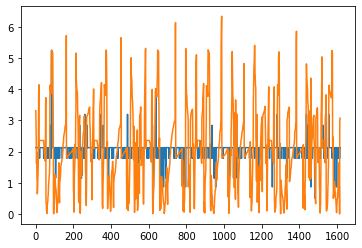

In [145]:
X_train = X[:math.floor(len(X)*.75)]

print(len(X_train))

y_train = y[:math.floor(len(y)*.75)]

print(len(y_train))

X_test = X[math.floor(len(X)*.75):]

y_test = y[math.floor(len(X)*.75):]

model = DecisionTreeRegressor(max_depth = 4)

model.fit(X_train,y_train)

preds_train = model.predict(X_train)

preds_test = model.predict(X_test)

plt.plot(range(len(y_train)), preds_train)

plt.plot(y_train)

plt.show() #the predictions are generally far from the observations

2.079464613920841 1.5625878255133436 1.50889099899506 0.034364037426595884


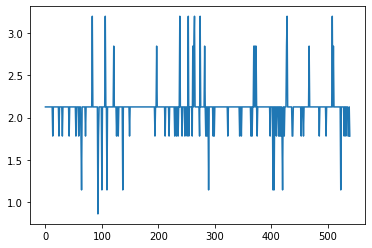

2.052117986648148 1.394286833482083 1.4452052317271047 -0.03651931368946393


In [147]:
#Performance of model on training and test data

mean_true_train = y_train.mean()

var_true_train = np.array([(y_train[i] - mean_true_train)**2 for i in range(len(y_train))]).mean()

res_train = np.array([(y_train[i] - preds_train[i])**2 for i in range(len(y_train))]).mean()

R2_train = 1 - res_train/var_true_train

print(mean_true_train, var_true_train, res_train, R2_train)


plt.plot(range(len(y_test)), preds_test)

plt.show()

mean_true_test = y_test.mean()

var_true_test = np.array([(y_test[i] - mean_true_test)**2 for i in range(len(y_test))]).mean()

res_test = np.array([(y_test[i] - preds_test[i])**2 for i in range(len(y_test))]).mean()

R2_test = 1 - res_test/var_true_test

print(mean_true_test, var_true_test, res_test, R2_test) #a negative R2 on the test set

In [ ]:
#The fourth model is a Vector Autoregression of the time series of daily averages of AvgTone of articles in which China is the recorded Actor 1, and the time series of daily averages of AvgTone of articles in which the US government is the recorded Actor 1 

In [150]:
chn_tone = pd.read_csv('China_tone.csv')

chn_tone = chn_tone.drop(['Unnamed: 0'], axis = 1)

chn_tone.head(5)

,dates,tone
0,2007-11-02T00:00:00.000Z,-2.780410
1,2007-11-07T00:00:00.000Z,-2.792584
2,2007-11-11T00:00:00.000Z,-2.802323
3,2007-11-13T00:00:00.000Z,-2.807192
4,2007-11-14T00:00:00.000Z,-2.809627


In [151]:
chn_tone = chn_tone.sort_values(by = ['dates'])

chn_tone.head(5)

,dates,tone
2467,2004-02-24T00:00:00.000Z,4.200542
2129,2004-02-25T00:00:00.000Z,4.190749
5033,2004-02-26T00:00:00.000Z,4.180955
1016,2004-02-27T00:00:00.000Z,4.171162
2130,2004-02-28T00:00:00.000Z,4.161369


In [167]:
join_tone = pd.merge(US_tone_w_trump_counts,chn_tone,on='dates',how='left')

tone_df = join_tone[['AvgTone','tone']]

tone_df.columns = ['US_tone','China_tone']

tone_df.head(5)

,US_tone,China_tone
0,3.313944,1.095197
1,2.962439,1.712310
2,2.540633,5.144567
3,1.907925,0.000000
4,1.603892,3.035682


In [169]:
grangercausalitytests(tone_df[['US_tone','China_tone']], maxlag=maxlag, verbose=False) #The daily average AvgTone time series for the US government does not seem to Granger cause the corresponding time series for China.

{1: ({'ssr_ftest': (3.073244937803544, 0.07973276616759689, 2153.0, 1),
   'ssr_chi2test': (3.0775272112886394, 0.07938113068494676, 1),
   'lrtest': (3.0753328303858325, 0.07948832217607088, 1),
   'params_ftest': (3.0732449378032647, 0.07973276616759689, 2153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.7897916767982665, 0.02275143420956218, 2150.0, 2),
   'ssr_chi2test': (7.597210291628153, 0.022401997593543978, 2),
   'lrtest': (7.583850126759444, 0.022552145726772523, 2),
   'params_ftest': (3.7897916767986803, 0.0227514342095563, 2150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.51337487333456, 0.05682642196778918, 2147.0, 3),
   'ssr_chi2test': (7.564708165574257, 0.055918926421672115, 3),
   'lrtest': (7.551455802143664, 0.05625096849968233, 3),
   'params_ftest': (2.513374873334445, 0.05682642196778918, 2147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [

In [170]:
grangercausalitytests(tone_df[['China_tone','US_tone']], maxlag=maxlag, verbose=False) #The daily average AvgTone time series for China seems to Granger cause the corresponding time series for the US government.

{1: ({'ssr_ftest': (0.02432712195178862, 0.8760700749295515, 2153.0, 1),
   'ssr_chi2test': (0.024361019474248145, 0.875969828820479, 1),
   'lrtest': (0.024360881845495896, 0.8759701763424039, 1),
   'params_ftest': (0.0243271219516714, 0.8760700749307594, 2153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5498323233303238, 0.5771276771712732, 2150.0, 2),
   'ssr_chi2test': (1.1022220063040447, 0.5763091732634197, 2),
   'lrtest': (1.1019402245747187, 0.5763903756813593, 2),
   'params_ftest': (0.5498323233305318, 0.5771276771712045, 2150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4092157579308804, 0.7463968513711998, 2147.0, 3),
   'ssr_chi2test': (1.2316498499065438, 0.7454238051444404, 3),
   'lrtest': (1.2312978574864246, 0.7455079921038975, 3),
   'params_ftest': (0.40921575793063036, 0.7463968513714285, 2147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [171]:
model_var_tone = VAR(np.asarray(tone_df))

In [172]:
result = model_var_tone.fit(3)

In [173]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 20, Dec, 2019
Time:                     18:16:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.635136
Nobs:                     2154.00    HQIC:                  0.611744
Log likelihood:          -6743.10    FPE:                    1.81893
AIC:                     0.598251    Det(Omega_mle):         1.80717
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.290628         0.026872           10.815           0.000
L1.y1         0.928800         0.021580           43.040           0.000
L1.y2         0.004561         0.005776            0.790           0.430
L2.y1        -0.051450